In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [9]:
orig_inputs = np.array ([[0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269, 0.79586362],
        [0.54300258, 0.9246939, 0.34156746, 0.64648585, 0.71844033, 0.34313266],
        [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285, 0.6402654],
        [0.11886697, 0.61505494, 0.90581639, 0.8553003, 0.41363143, 0.58523563],
        [0.63021764, 0.8380969, 0.68001305, 0.73189509, 0.52673671, 0.34842921],
        [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277, 0.09579366],
        [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833, 0.73096984],
        [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418, 0.10703171],
        [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083, 0.6924164 ],
        [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917, 0.05109986],
        [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098, 0.63747637],
        [0.72261522, 0.01181284, 0.06364591, 0.16517311, 0.07924415, 0.35995166],
        [0.07566492, 0.33450212, 0.13273274, 0.60831236, 0.91838592, 0.82233079],
        [0.94245084, 0.37743962, 0.48612233, 0.22879108, 0.08263175, 0.71195755],
        [0.14864702, 0.03394336, 0.72880565, 0.31606646, 0.02176938, 0.51691776],
        [0.81711239, 0.54816823, 0.10334758, 0.12436955, 0.72823482, 0.44967361],
        [0.41762629, 0.06409998, 0.24566877, 0.5590408, 0.19153138, 0.25464092],
        [0.72628566, 0.46489581, 0.92457051, 0.8072454, 0.6354384, 0.14341787],
        [0.31981043, 0.52009759, 0.29067775, 0.87670668, 0.49503469, 0.6190825],
        [0.87987128, 0.39796199, 0.00363456, 0.95699064, 0.26451373, 0.11486924],
        [0.54124078, 0.63140314, 0.03190205, 0.44998156, 0.79865282, 0.63370429],
        [0.22634792, 0.11502581, 0.82474966, 0.94538372, 0.90531153, 0.95101392],
        [0.68685257, 0.04101721, 0.00757301, 0.285009, 0.69156848, 0.6555429],
        [0.17597754, 0.6244165, 0.29554198, 0.46955276, 0.09776977, 0.72814108],
        [0.88164674, 0.20445019, 0.41447436, 0.42038468, 0.26491501, 0.73066019],
        [0.06661051, 0.52804507, 0.8160952 , 0.96101714, 0.08650933, 0.77778822],
        [0.93246638, 0.48881189, 0.25860774, 0.95624344, 0.19042781, 0.51985176],
        [0.84686697, 0.14242917, 0.06066859, 0.75629213, 0.5523983, 0.08130609],
        [0.80628208, 0.32412237, 0.72607601, 0.14871213, 0.7193764, 0.36288398],
        [0.47682313, 0.34094195, 0.01433523, 0.88013956, 0.9986547, 0.07966402], 
        [0.5533924, 0.94265688, 0.37843995, 0.81644951, 0.30724102, 0.68667292],
        [0.57767921, 0.77666698, 0.49167411, 0.8109403, 0.2573919, 0.3111875 ],
        [0.59949888, 0.87032335, 0.07862039, 0.8774701, 0.44857133, 0.14032067],
        [0.34391181, 0.16237337, 0.64747514, 0.33306226, 0.58985232, 0.34861981],
        [0.25025126, 0.50258132, 0.86529474, 0.3948412, 0.57668213, 0.22758252],
        [0.38041208, 0.49217965, 0.16343703, 0.34501486, 0.00249229, 0.72742987],
        [0.7000382, 0.24792505, 0.99685626, 0.78816919, 0.4212353, 0.24110836],
        [0.27215304, 0.36229447, 0.14792418, 0.98929021, 0.6172454, 0.90575561],
        [0.98596285, 0.56551037, 0.0336468, 0.81835521, 0.06473044, 0.29100716],
        [0.10557451, 0.53066877, 0.70973029, 0.38713039, 0.377642, 0.68745292],
        [0.41965144, 0.10239981, 0.65162054, 0.13551419, 0.17390985, 0.2449025 ],
        [0.38333381, 0.48490161, 0.02330837, 0.31080082, 0.40659607, 0.37986672],
        [0.64234772, 0.62485994, 0.59955676, 0.69695586, 0.58430151, 0.62741632],
        [0.25112425, 0.02864035, 0.57442658, 0.30767792, 0.12493266, 0.81482005],
        [0.67553455, 0.82278286, 0.56616623, 0.76746994, 0.94375052, 0.17817038],
        [0.28944287, 0.66217003, 0.77907406, 0.67926704, 0.75774697, 0.19114322],
        [0.2641496, 0.33834387, 0.02791976, 0.79138507, 0.53999442, 0.03078242],
        [0.72853841, 0.66131919, 0.82160388, 0.84709947, 0.51182809, 0.87821668],
        [0.89376992, 0.0495654 , 0.37882925, 0.08810275, 0.20628684, 0.33004916],
        [0.72124889, 0.42033325, 0.52594238, 0.29409231, 0.75095604, 0.00824324],
        [0.02217805, 0.36399255, 0.40746356, 0.76190553, 0.84288594, 0.20669374],
        [0.01173165, 0.79725639, 0.19069447, 0.61651098, 0.92391729, 0.54878971],
        [0.07440619, 0.73607083, 0.11969825, 0.56493241, 0.02357042, 0.81937945],
        [0.34817805, 0.10388219, 0.37486701, 0.91807747, 0.2251307, 0.55431265],
        [0.35905913, 0.42182687, 0.88257684, 0.99104029, 0.57366693, 0.71468722],
        [0.74989625, 0.77315963, 0.93679838, 0.6745058 , 0.41011799, 0.52921798],
        [0.17906201, 0.97780095, 0.34230596, 0.9270413 , 0.35441174, 0.35621829],
        [0.20131011, 0.20614847, 0.76968778, 0.33429616, 0.4874355, 0.13151584],
        [0.19159697, 0.25271152, 0.39095255, 0.22910573, 0.36328738, 0.86194604],
        [0.3666046, 0.8950202, 0.25725146, 0.74359107, 0.90913351, 0.88113057]])

In [11]:
orig_inputs

array([[0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269,
        0.79586362],
       [0.54300258, 0.9246939 , 0.34156746, 0.64648585, 0.71844033,
        0.34313266],
       [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285,
        0.6402654 ],
       [0.11886697, 0.61505494, 0.90581639, 0.8553003 , 0.41363143,
        0.58523563],
       [0.63021764, 0.8380969 , 0.68001305, 0.73189509, 0.52673671,
        0.34842921],
       [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277,
        0.09579366],
       [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833,
        0.73096984],
       [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418,
        0.10703171],
       [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083,
        0.6924164 ],
       [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917,
        0.05109986],
       [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098,
        0.63747637],
       [0.72261522, 0

In [13]:
# Add the new data points
new_data = np.array([[0.026242, 0.661049, 0.457158, 0.191463, 0.644135, 0.986154],
                     [0.056134, 0.928563, 0.227892, 0.962073, 0.092508, 0.752128],
                     [0.065581, 0.519398, 0.310185, 0.078128, 0.104823, 0.735173],
                     [0.093275, 0.502314, 0.26028, 0.214942, 0.272898, 0.741334],
                     [0.083569, 0.342786, 0.281324, 0.192723, 0.257369, 0.708404],
                     [0.10102 , 0.379681, 0.260541, 0.204145, 0.241228, 0.692476],
                     [0.142026, 0.349671, 0.277856, 0.238033, 0.236636, 0.708027],
                     [0.119104, 0.67931 , 0.25776 , 0.267889, 0.241529, 0.759262]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(60, 68)

In [17]:
orig_outputs = np.array([0.6044327 , 0.56275307, 0.00750324, 0.0614243, 0.2730468,
       0.08374657, 1.3649683, 0.09264495, 0.0178696 , 0.03356494,
       0.0735163, 0.2063097, 0.00882563, 0.26840032, 0.61152553,
       0.01479818, 0.27489251, 0.06676325, 0.04211835, 0.00270147,
       0.01820907, 0.00701603, 0.10050661, 0.47539552, 0.67514163,
       0.51645722, 0.00377748, 0.00313433, 0.02134252, 0.09541116,
       0.01922624, 0.36330243, 0.55407875, 0.50328569, 0.37857884, 
       0.35142060, 0.02183850, 0.00274181, 0.00284504, 1.42061766,
       0.40091479, 0.76315471, 0.05418833, 1.48980895, 0.43444452, 
       1.08014511, 0.12891794, 0.13770230, 0.18315880, 0.04764594,
       0.03762268, 0.01272042, 0.07604335, 0.05572355, 0.06435507, 
       0.04803639, 0.08927954, 0.19203278, 2.11469067, 0.00214980])

In [19]:
orig_outputs

array([0.6044327 , 0.56275307, 0.00750324, 0.0614243 , 0.2730468 ,
       0.08374657, 1.3649683 , 0.09264495, 0.0178696 , 0.03356494,
       0.0735163 , 0.2063097 , 0.00882563, 0.26840032, 0.61152553,
       0.01479818, 0.27489251, 0.06676325, 0.04211835, 0.00270147,
       0.01820907, 0.00701603, 0.10050661, 0.47539552, 0.67514163,
       0.51645722, 0.00377748, 0.00313433, 0.02134252, 0.09541116,
       0.01922624, 0.36330243, 0.55407875, 0.50328569, 0.37857884,
       0.3514206 , 0.0218385 , 0.00274181, 0.00284504, 1.42061766,
       0.40091479, 0.76315471, 0.05418833, 1.48980895, 0.43444452,
       1.08014511, 0.12891794, 0.1377023 , 0.1831588 , 0.04764594,
       0.03762268, 0.01272042, 0.07604335, 0.05572355, 0.06435507,
       0.04803639, 0.08927954, 0.19203278, 2.11469067, 0.0021498 ])

In [21]:
outputs = np.array([0.6044327 , 0.56275307, 0.00750324, 0.0614243, 0.2730468,
       0.08374657, 1.3649683, 0.09264495, 0.0178696 , 0.03356494,
       0.0735163, 0.2063097, 0.00882563, 0.26840032, 0.61152553,
       0.01479818, 0.27489251, 0.06676325, 0.04211835, 0.00270147,
       0.01820907, 0.00701603, 0.10050661, 0.47539552, 0.67514163,
       0.51645722, 0.00377748, 0.00313433, 0.02134252, 0.09541116,
       0.01922624, 0.36330243, 0.55407875, 0.50328569, 0.37857884, 
       0.35142060, 0.02183850, 0.00274181, 0.00284504, 1.42061766,
       0.40091479, 0.76315471, 0.05418833, 1.48980895, 0.43444452, 
       1.08014511, 0.12891794, 0.13770230, 0.18315880, 0.04764594,
       0.03762268, 0.01272042, 0.07604335, 0.05572355, 0.06435507, 
       0.04803639, 0.08927954, 0.19203278, 2.11469067, 0.00214980,
       0.15025306, 0.00195398, 0.61114585, 1.65279874, 2.21033229, 
       2.08777363, 2.32233190, 0.94220538])
len(orig_outputs), len(outputs)

(60, 68)

In [23]:
outputs

array([6.04432700e-01, 5.62753070e-01, 7.50324000e-03, 6.14243000e-02,
       2.73046800e-01, 8.37465700e-02, 1.36496830e+00, 9.26449500e-02,
       1.78696000e-02, 3.35649400e-02, 7.35163000e-02, 2.06309700e-01,
       8.82563000e-03, 2.68400320e-01, 6.11525530e-01, 1.47981800e-02,
       2.74892510e-01, 6.67632500e-02, 4.21183500e-02, 2.70147000e-03,
       1.82090700e-02, 7.01603000e-03, 1.00506610e-01, 4.75395520e-01,
       6.75141630e-01, 5.16457220e-01, 3.77748000e-03, 3.13433000e-03,
       2.13425200e-02, 9.54111600e-02, 1.92262400e-02, 3.63302430e-01,
       5.54078750e-01, 5.03285690e-01, 3.78578840e-01, 3.51420600e-01,
       2.18385000e-02, 2.74181000e-03, 2.84504000e-03, 1.42061766e+00,
       4.00914790e-01, 7.63154710e-01, 5.41883300e-02, 1.48980895e+00,
       4.34444520e-01, 1.08014511e+00, 1.28917940e-01, 1.37702300e-01,
       1.83158800e-01, 4.76459400e-02, 3.76226800e-02, 1.27204200e-02,
       7.60433500e-02, 5.57235500e-02, 6.43550700e-02, 4.80363900e-02,
      

In [25]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'feature5': orig_inputs[:,4],
             'feature6': orig_inputs[:,5],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
5,0.764919,0.255883,0.609084,0.218079,0.322943,0.095794,0.083747
6,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968
7,0.195252,0.079227,0.554580,0.170567,0.014944,0.107032,0.092645
8,0.642303,0.836875,0.021793,0.101488,0.683071,0.692416,0.017870
9,0.789943,0.195545,0.575623,0.073659,0.259049,0.051100,0.033565


In [27]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'feature5': inputs[:,4],
        'feature6': inputs[:,5],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
...,...,...,...,...,...,...,...
63,0.093275,0.502314,0.260280,0.214942,0.272898,0.741334,1.652799
64,0.083569,0.342786,0.281324,0.192723,0.257369,0.708404,2.210332
65,0.101020,0.379681,0.260541,0.204145,0.241228,0.692476,2.087774
66,0.142026,0.349671,0.277856,0.238033,0.236636,0.708027,2.322332


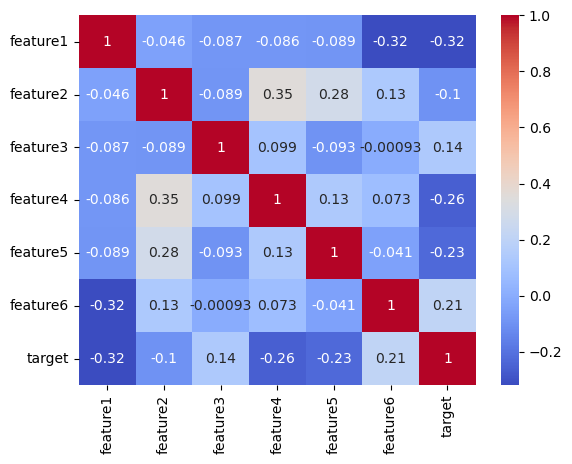

In [29]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

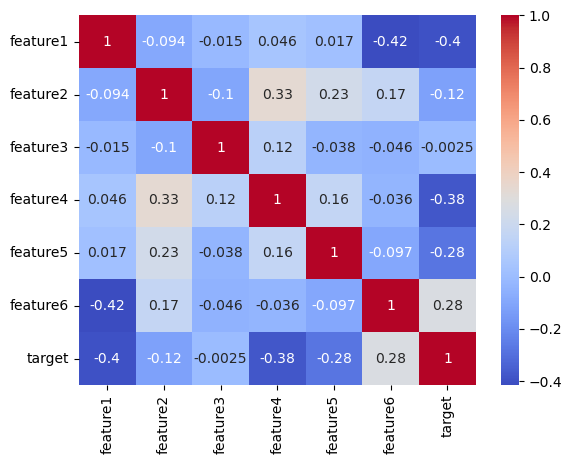

In [31]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  68 non-null     float64
 1   feature2  68 non-null     float64
 2   feature3  68 non-null     float64
 3   feature4  68 non-null     float64
 4   feature5  68 non-null     float64
 5   feature6  68 non-null     float64
 6   target    68 non-null     float64
dtypes: float64(7)
memory usage: 3.8 KB


In [35]:
orig_df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.464460,0.450841,0.430368,0.560411,0.463216,0.473263,0.293648
std,0.283977,0.271913,0.304974,0.293660,0.288367,0.273951,0.430132
min,0.011732,0.011813,0.003635,0.073659,0.002492,0.008243,0.002150
25%,0.220088,0.237481,0.144126,0.304282,0.220420,0.237727,0.021715
50%,0.418639,0.461160,0.384891,0.612412,0.434903,0.518385,0.090962
75%,0.721590,0.638882,0.687442,0.816926,0.698286,0.712640,0.409297
max,0.985963,0.977801,0.996856,0.991040,0.998655,0.951014,2.114691


In [37]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.419920,0.461959,0.414046,0.529030,0.439472,0.507040,0.405848
std,0.293692,0.265217,0.290615,0.302280,0.283759,0.275136,0.592771
min,0.011732,0.011813,0.003635,0.073659,0.002492,0.008243,0.001954
25%,0.146992,0.255090,0.183880,0.235801,0.220420,0.252206,0.030633
50%,0.362832,0.474899,0.367481,0.514297,0.411875,0.569774,0.114712
75%,0.690149,0.661117,0.648511,0.812318,0.653869,0.728771,0.525863
max,0.985963,0.977801,0.996856,0.991040,0.998655,0.986154,2.322332


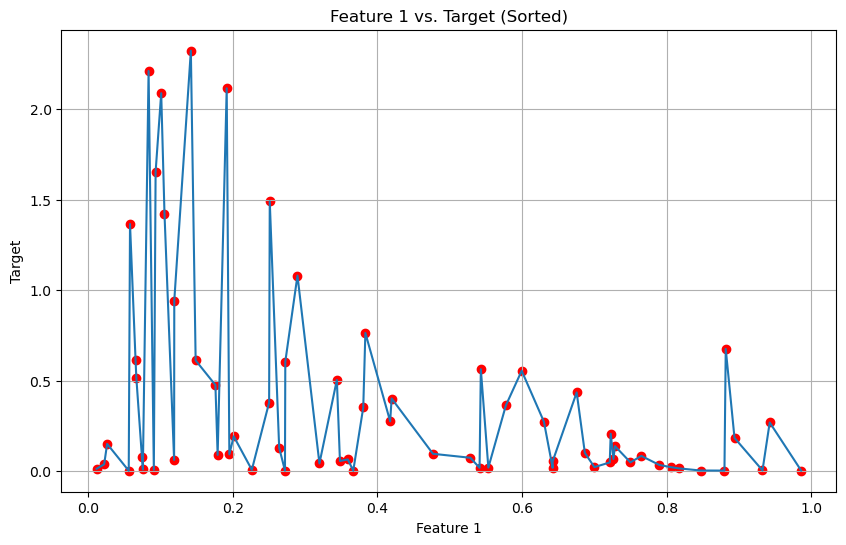

In [39]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

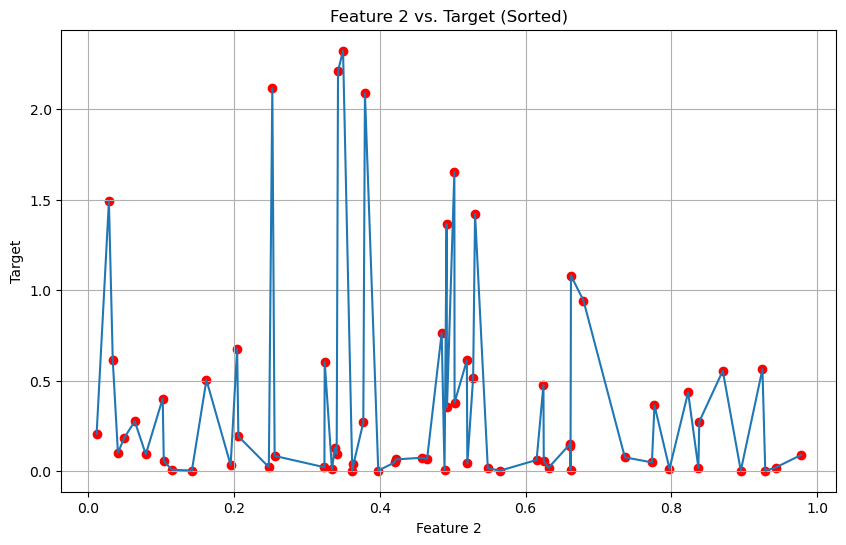

In [41]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

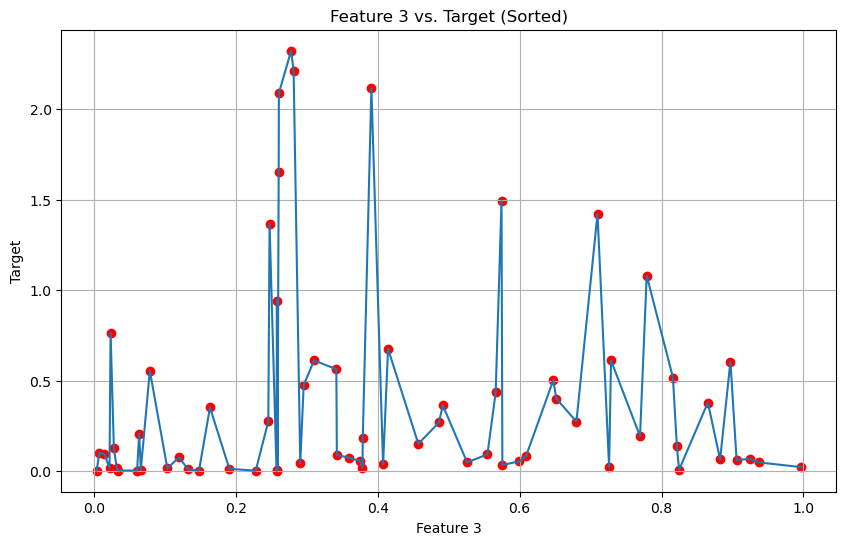

In [43]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

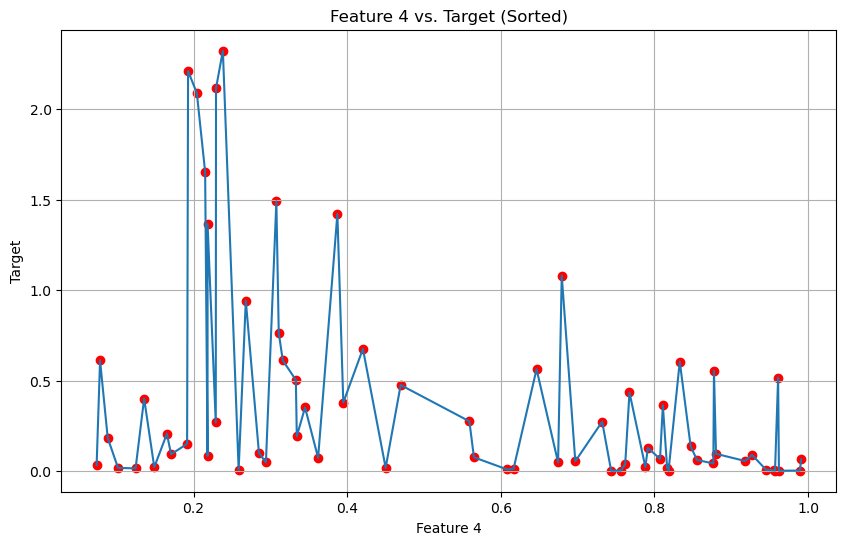

In [45]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

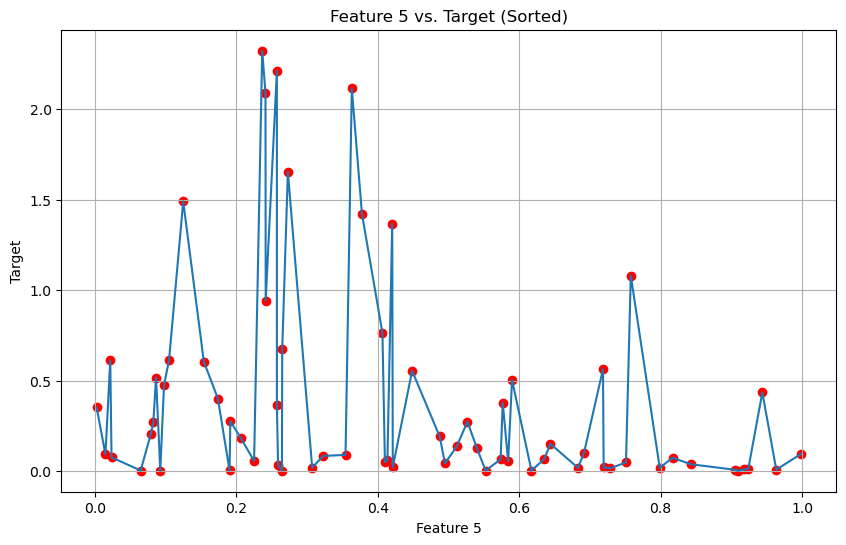

In [47]:
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target (Sorted)')
plt.grid(True)
plt.show()

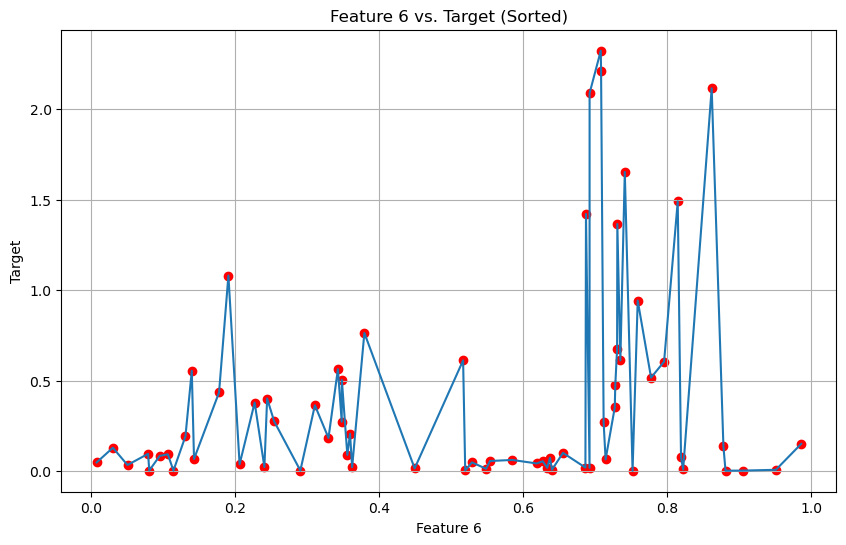

In [49]:
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [51]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
#    'normalize_y': [True],
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......
Best parameters: {'alpha': 1e-10, 'kernel': 1**2 * RBF(length_scale=0.1), 'n_restarts_optimizer': 15, 'normalize_y': True}
Best score: -0.32926603661792875


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.1),
                         n_restarts_optimizer=15, normalize_y=True)

In [53]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.1),
                         n_restarts_optimizer=15, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


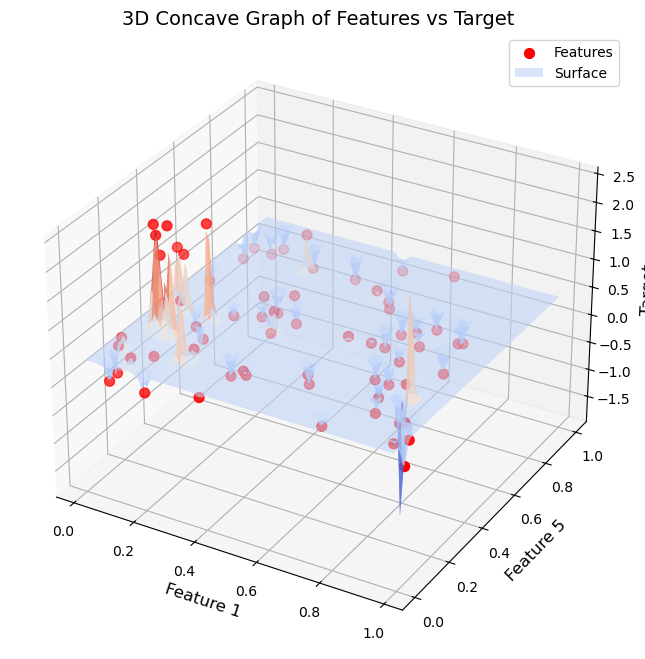

In [55]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature5'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature5'].min(), df['feature5'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature5']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 5', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

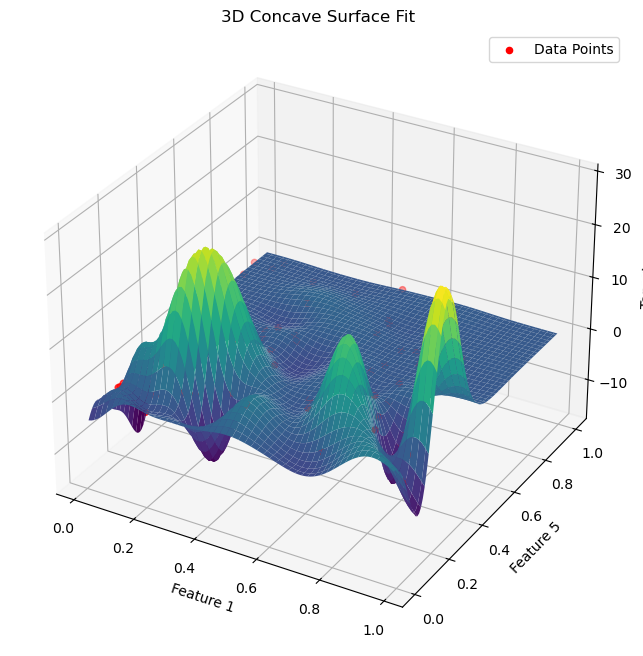

In [57]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature5']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 5')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

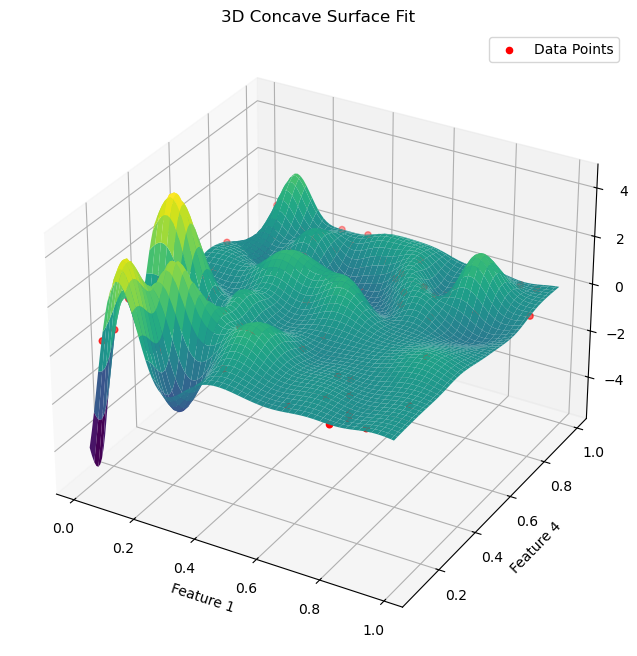

In [59]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

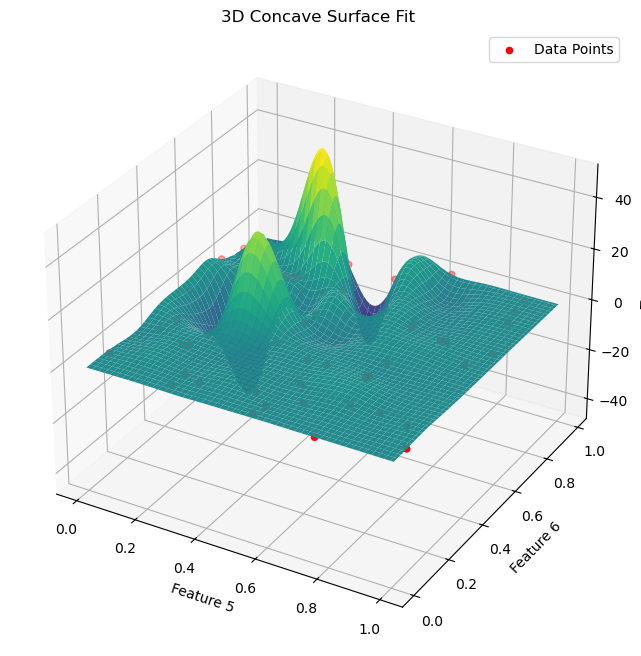

In [61]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature5']
feature2 = df['feature6']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 5')
ax.set_ylabel('Feature 6')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


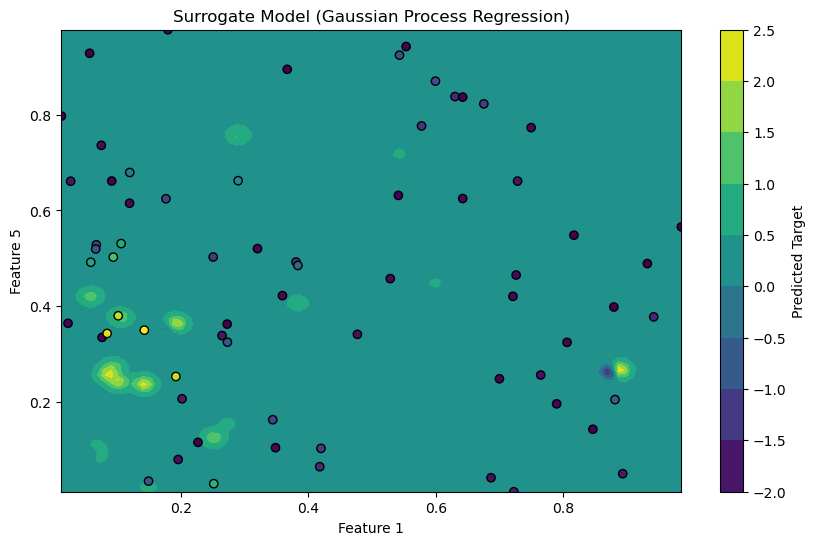

In [63]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature5']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 5')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


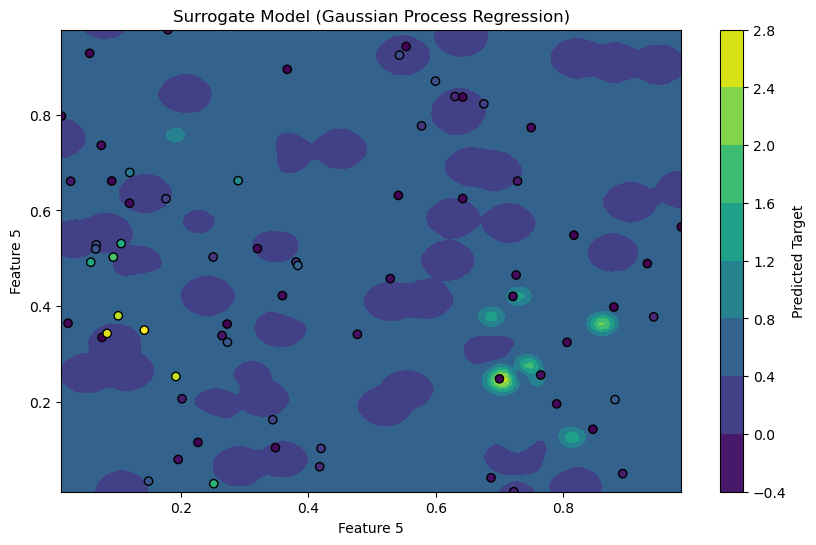

In [65]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature6', 'feature5']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 5')
plt.ylabel('Feature 5')

# Show the plot
plt.show()

In [67]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")

Feature 1 at peak of target: 0.142026
Feature 2 at peak of target: 0.349671
Feature 3 at peak of target: 0.277856
Feature 4 at peak of target: 0.238033
Feature 5 at peak of target: 0.236636
Feature 6 at peak of target: 0.708027


In [69]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")

Feature 1 at peak of target: 0.056134
Feature 2 at peak of target: 0.928563
Feature 3 at peak of target: 0.227892
Feature 4 at peak of target: 0.962073
Feature 5 at peak of target: 0.092508
Feature 6 at peak of target: 0.752128


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


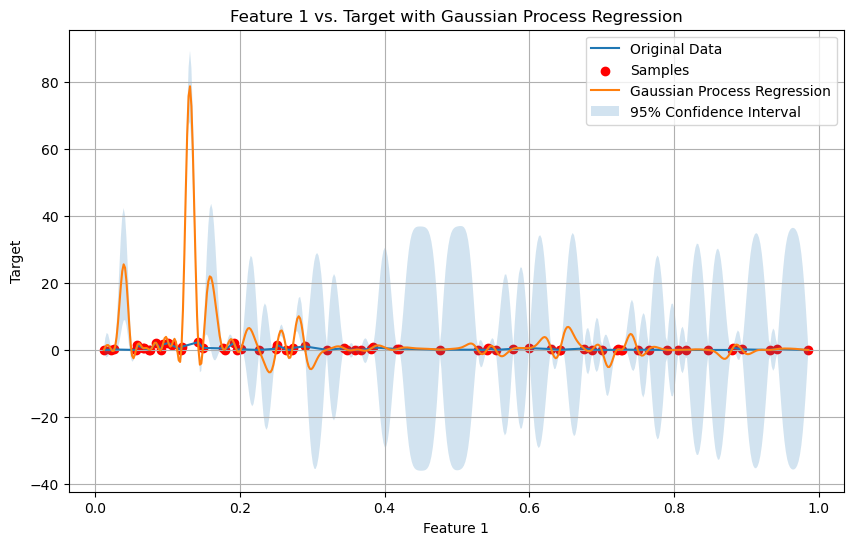

31.6**2 * RBF(length_scale=0.01)


In [71]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit.  
# Increased the number of RBF kernels and adjusted their length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=2.0)


# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
# Increased alpha for more flexibility to noise
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.2, n_restarts_optimizer=50, normalize_y=True, random_state=0)
gpr.fit(X, y)


# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


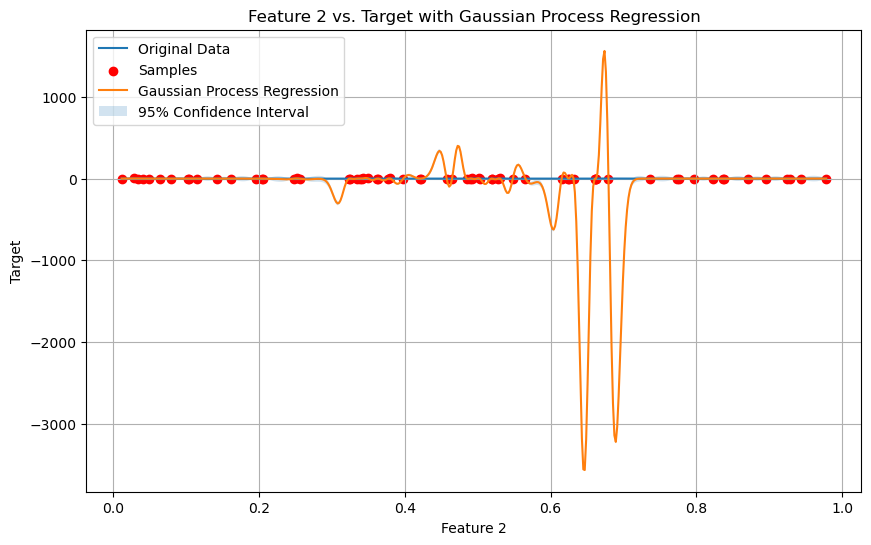

31.6**2 * RBF(length_scale=0.01)


In [73]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel. Experiment with different kernels and parameters
#kernel = 1.0 * RBF(length_scale=1.0)

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


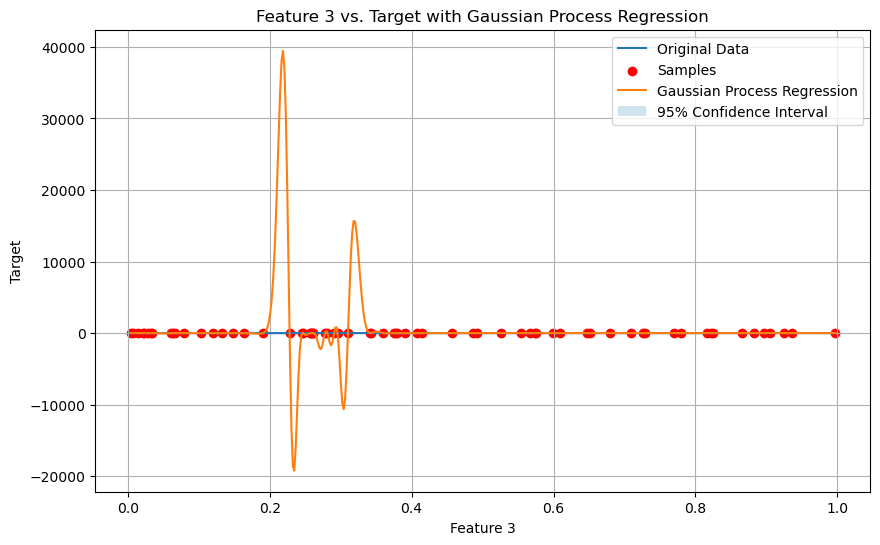

31.6**2 * RBF(length_scale=0.01)


In [75]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature3' as input
y = df_sorted['target'].values

# Define the kernel. Experiment with different kernels and parameters
#kernel = 1.0 * RBF(length_scale=1.0)

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


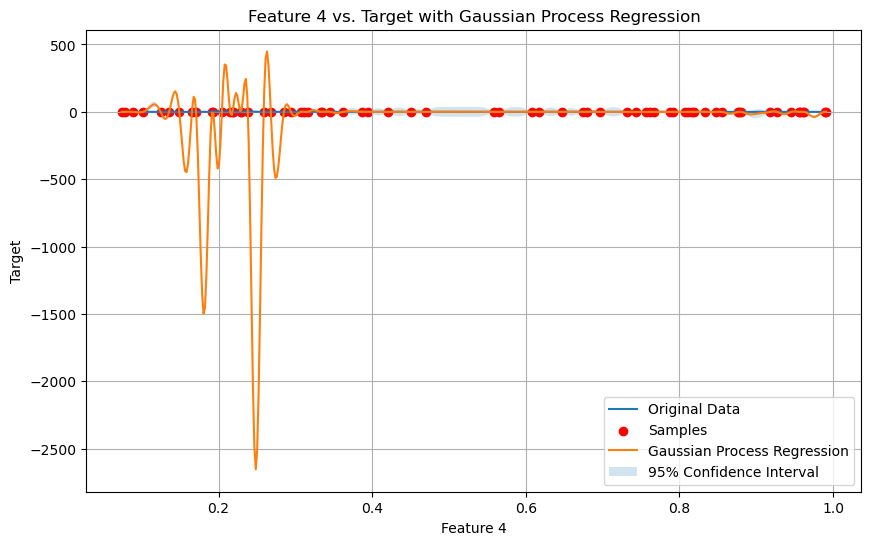

31.6**2 * RBF(length_scale=0.01)


In [77]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature4']].values  # Use only 'feature4' as input
y = df_sorted['target'].values

# Define the kernel. Experiment with different kernels and parameters
#kernel = 1.0 * RBF(length_scale=1.0)

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


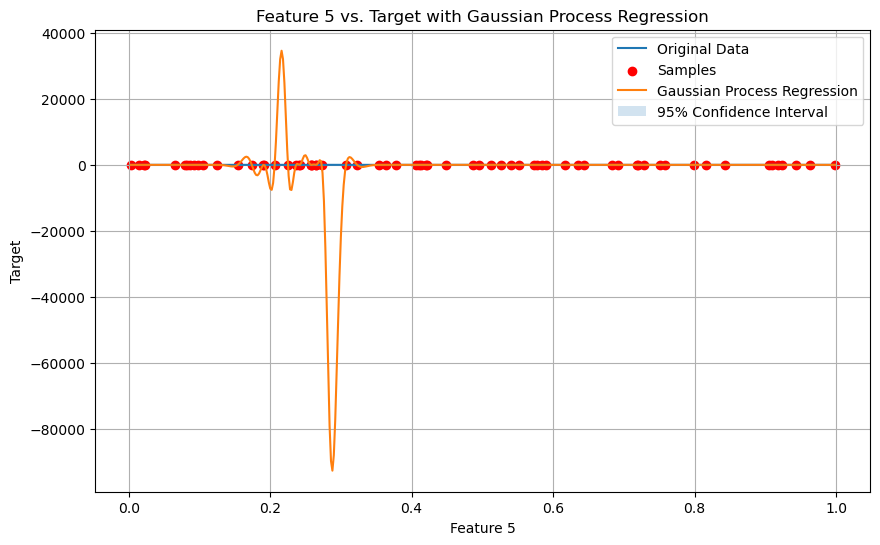

31.6**2 * RBF(length_scale=0.01)


In [79]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature5']].values  # Use only 'feature5' as input
y = df_sorted['target'].values

# Define the kernel. Experiment with different kernels and parameters
#kernel = 1.0 * RBF(length_scale=1.0)

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


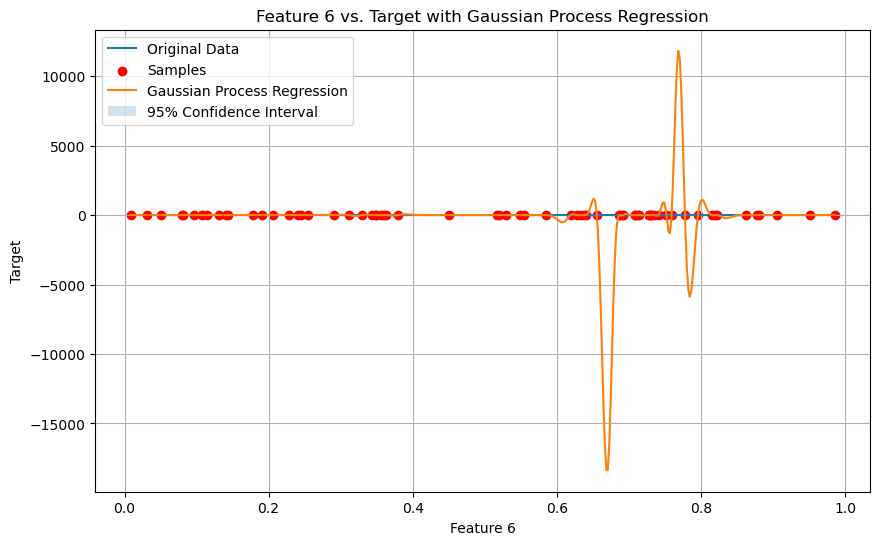

31.6**2 * RBF(length_scale=0.01)


In [81]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature6']].values  # Use only 'feature6' as input
y = df_sorted['target'].values

# Define the kernel. Experiment with different kernels and parameters
#kernel = 1.0 * RBF(length_scale=1.0)

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


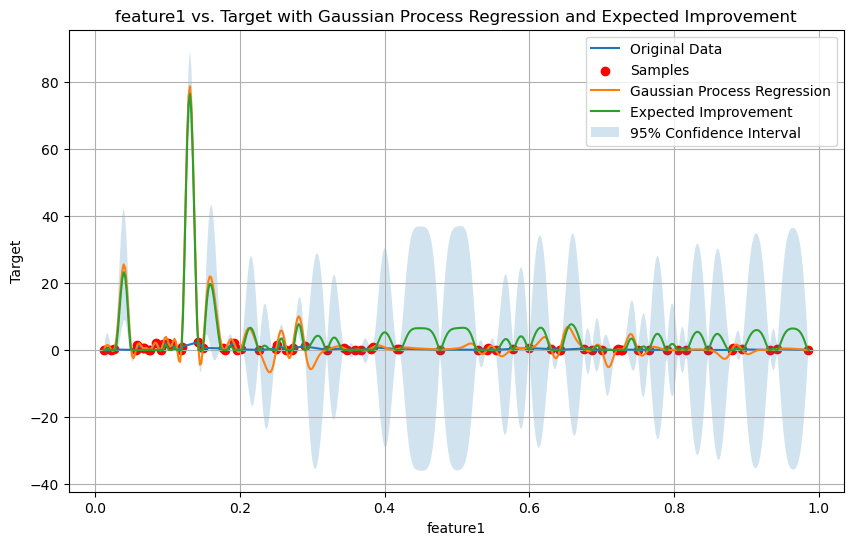

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


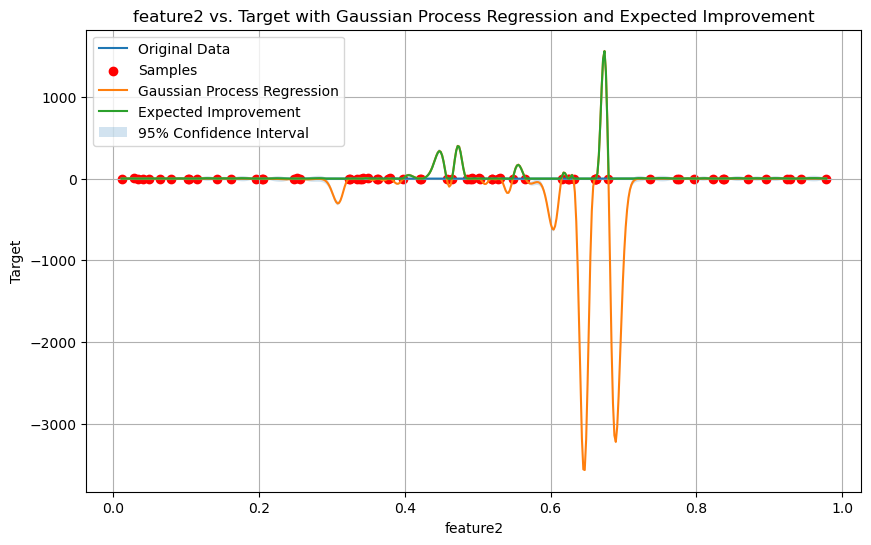

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


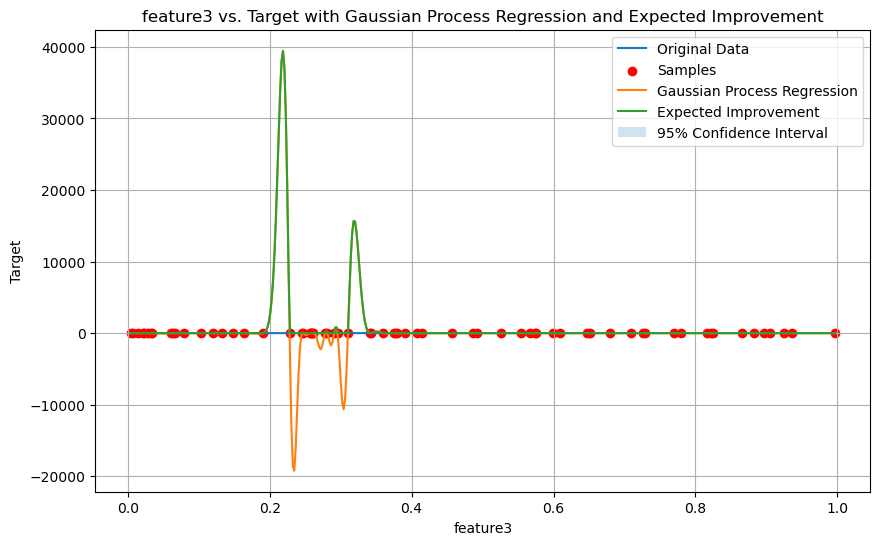

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


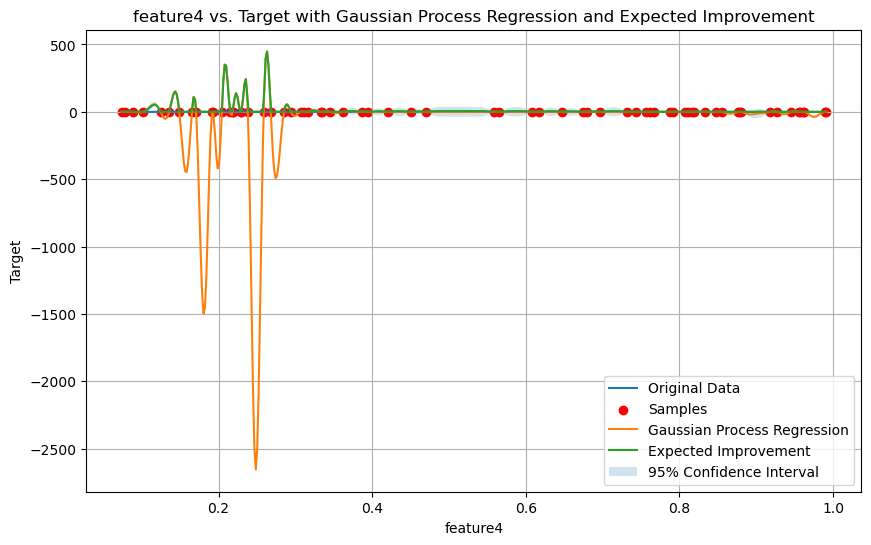

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


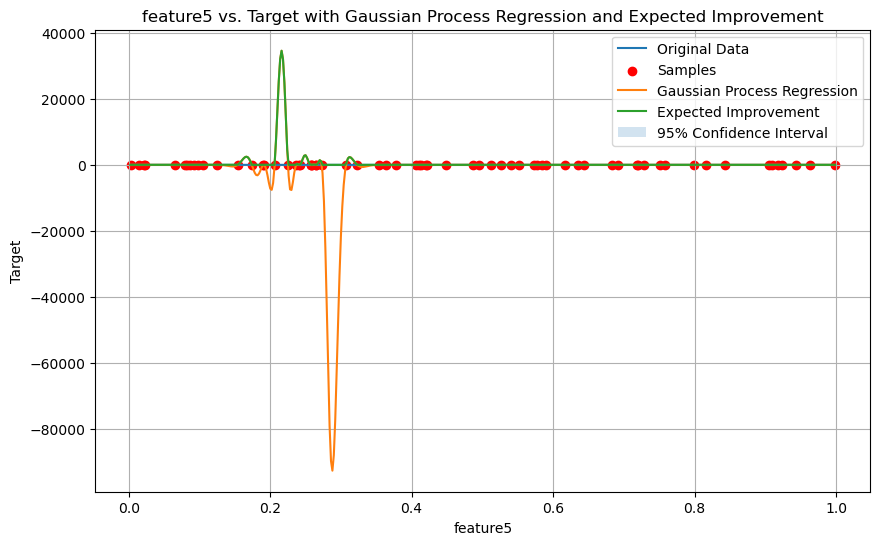

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


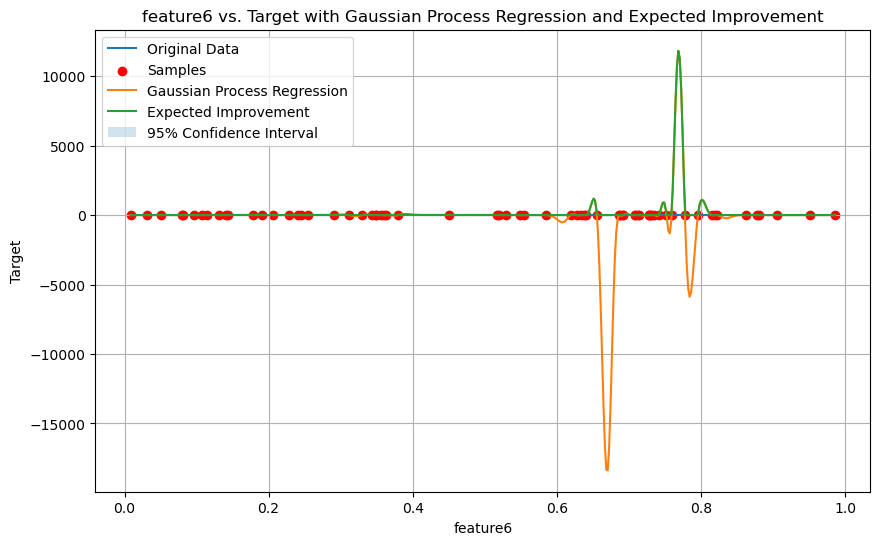

In [83]:
from scipy.stats import norm

# Assuming df is already defined as in your provided code

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Expected Improvement
    y_best = np.max(y)  # Current best observed target value
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ei, label='Expected Improvement') #Plot EI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Expected Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


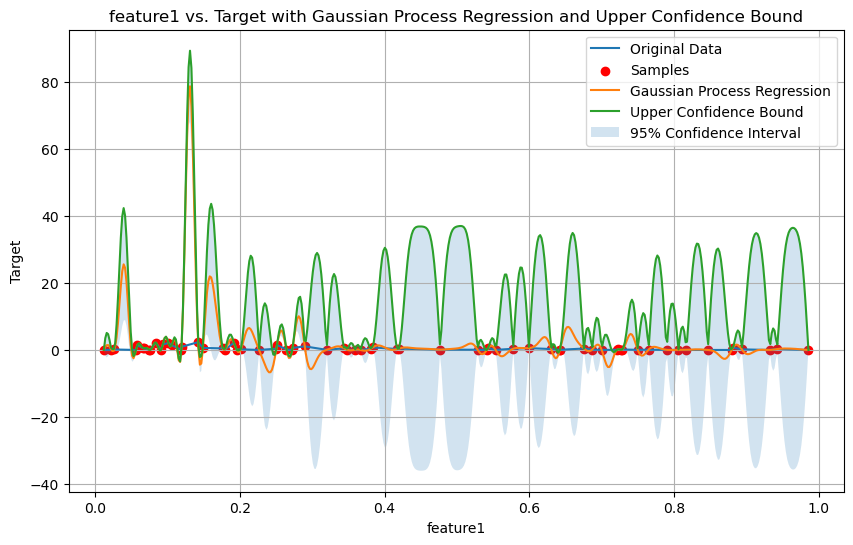

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


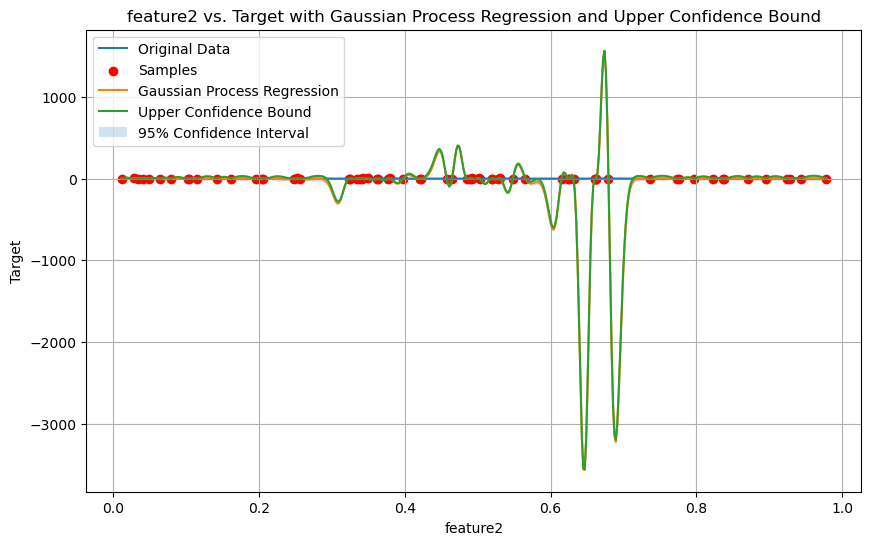

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


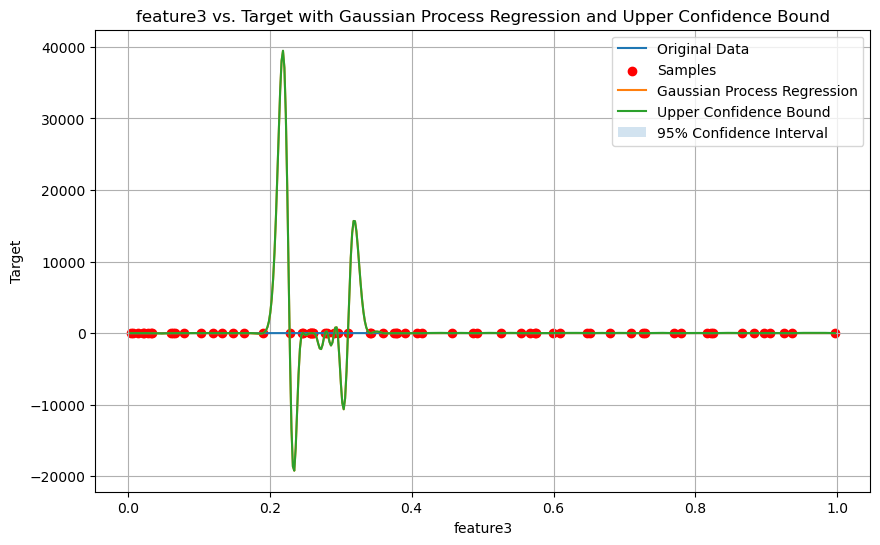

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


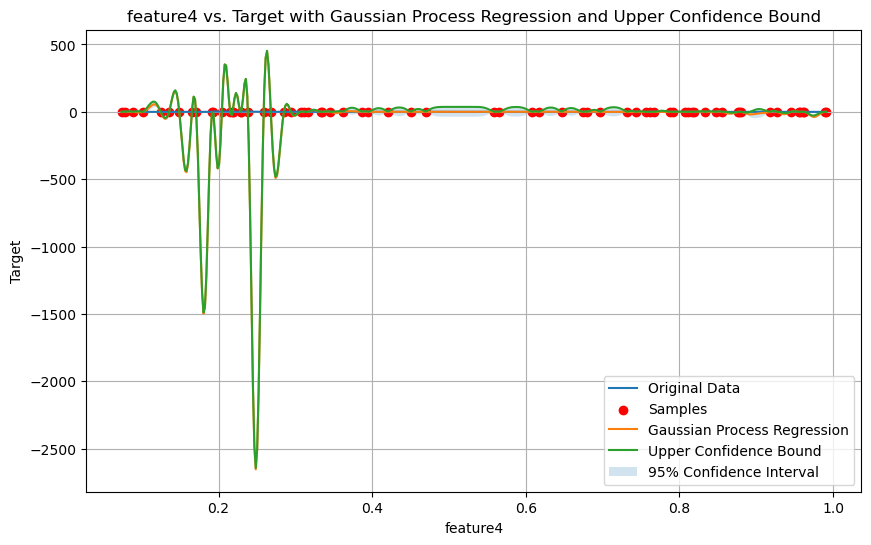

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


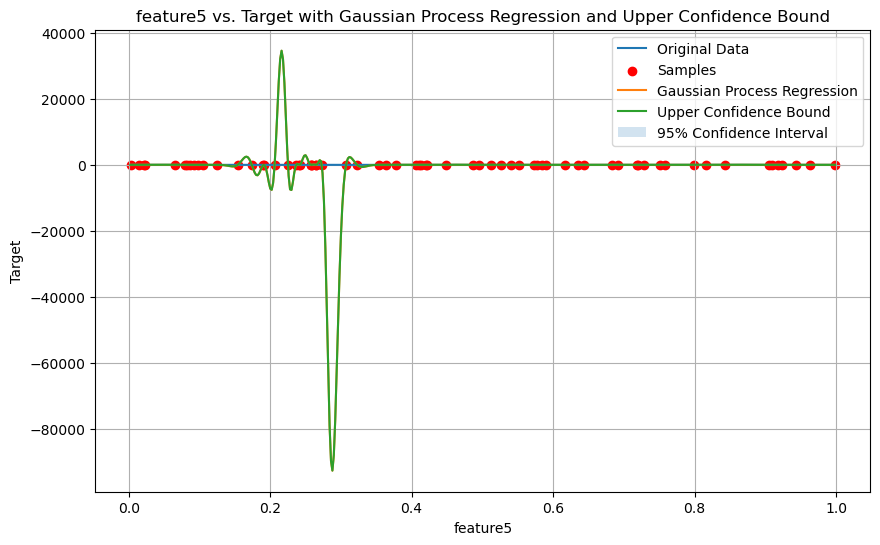

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


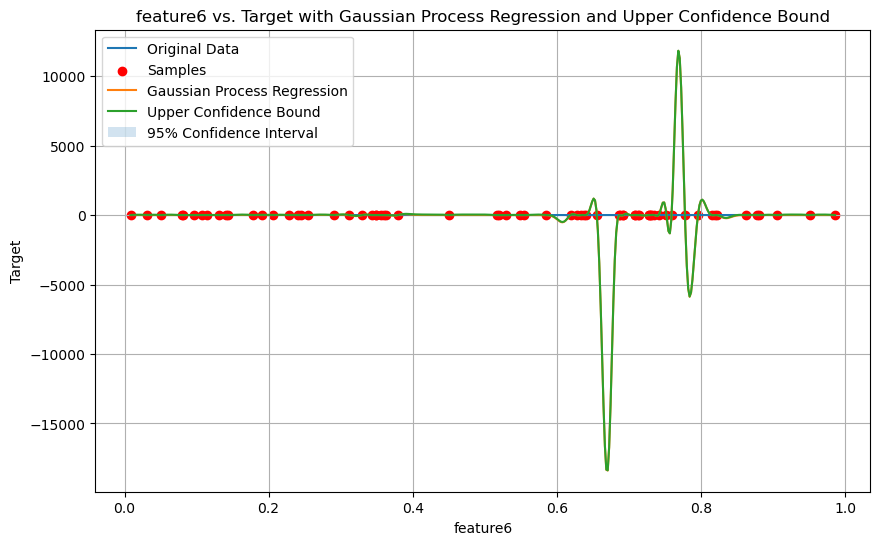

In [85]:
# 

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Upper Confidence Bound (UCB)
    ucb = y_pred + 1.96 * sigma # 95% confidence interval

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ucb, label='Upper Confidence Bound') #Plot UCB
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Upper Confidence Bound')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


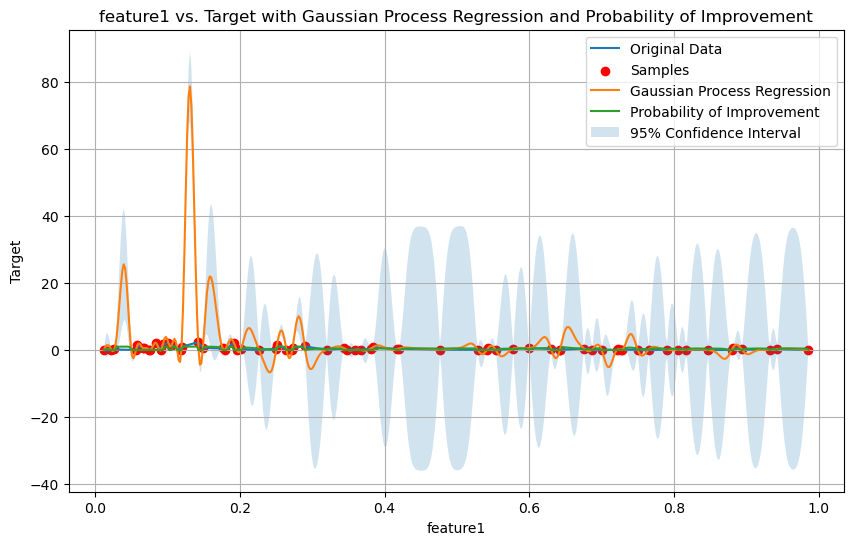

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


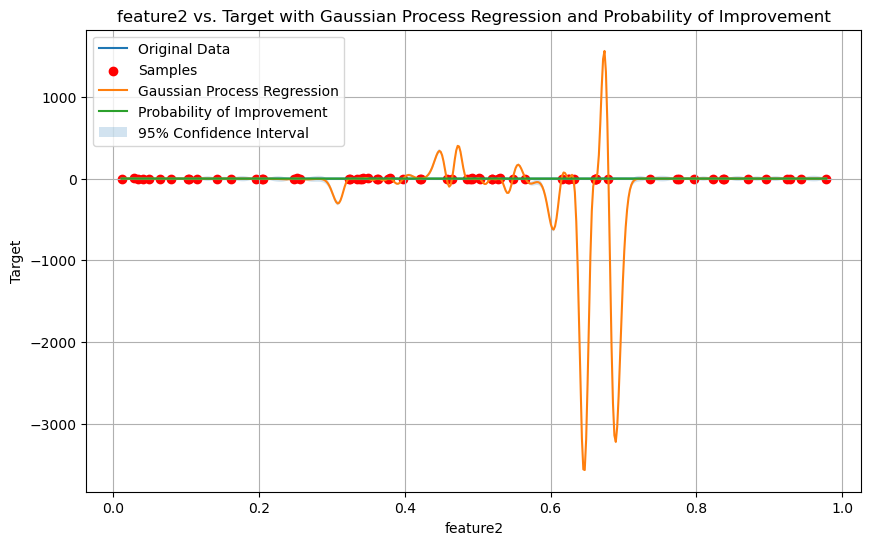

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


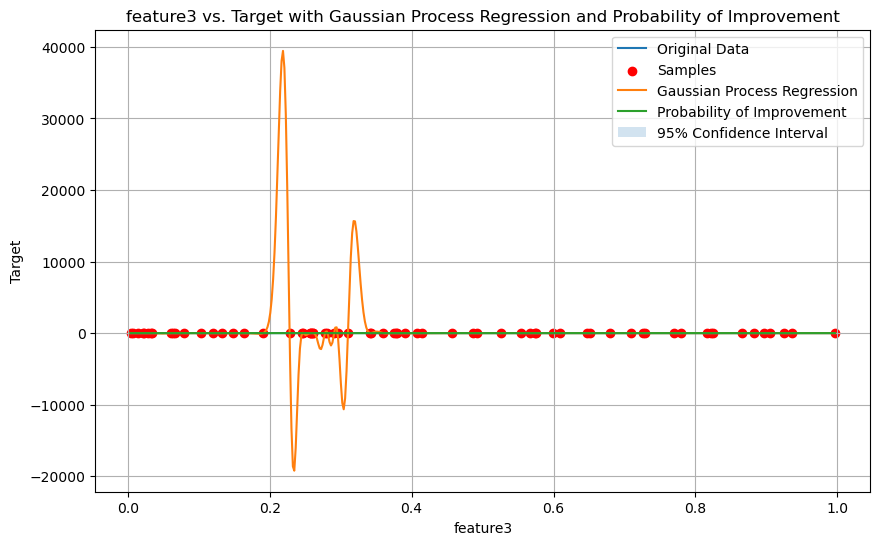

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


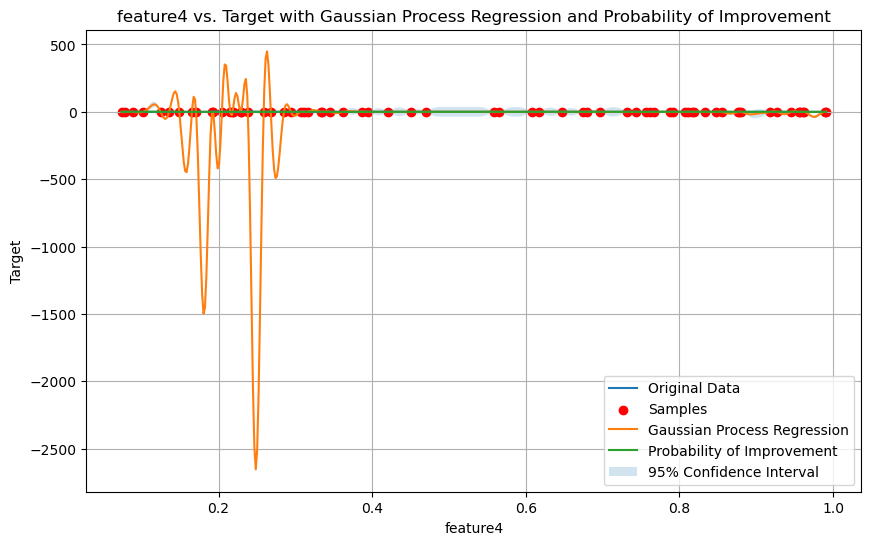

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


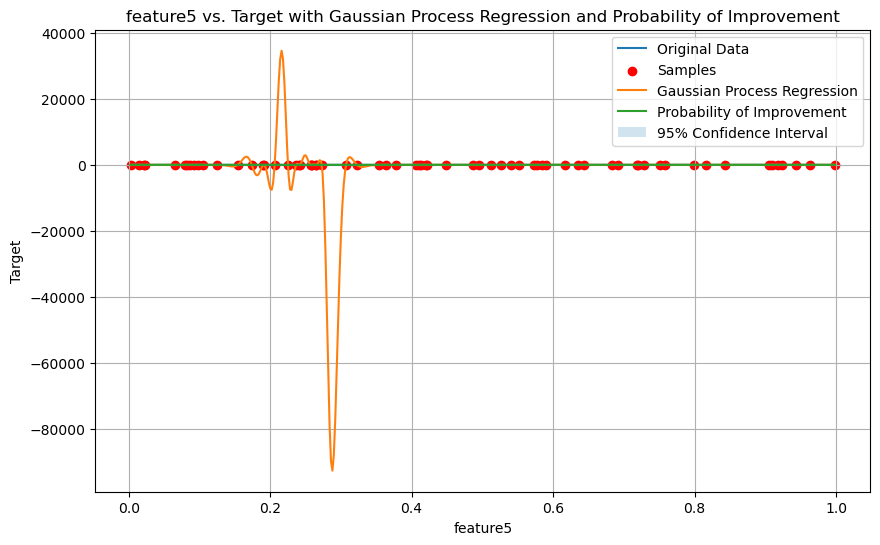

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


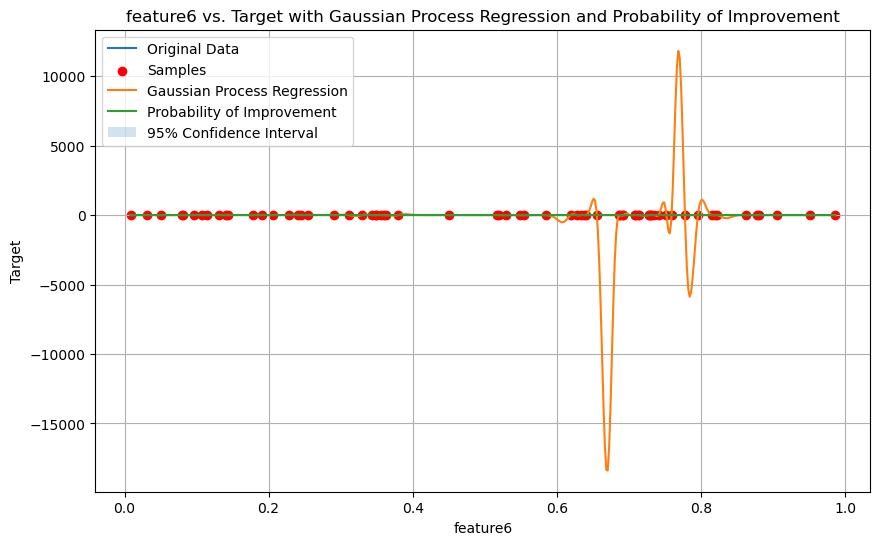

In [87]:
# Assuming df is already defined as in your provided code

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (PI)
    y_best = np.max(y)  # Current best observed target value
    pi = norm.cdf((y_pred - y_best - 0.01) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement') #Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Probability of Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

In [89]:
# Find the feature1 data point with the highest Expected Improvement
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    y_best = np.max(y)
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    best_ei_index = np.argmax(ei)
    best_feature1_ei = X_pred[best_ei_index][0]

    print(f"For {feature}, the feature1 data point with the highest Expected Improvement is: {best_feature1_ei}")

    # Find the feature1 data point with the highest Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma
    best_ucb_index = np.argmax(ucb)
    best_feature1_ucb = X_pred[best_ucb_index][0]
    print(f"For {feature}, the feature1 data point with the highest Upper Confidence Bound is: {best_feature1_ucb}")

    # Find the feature1 data point with the highest Probability of Improvement
    pi = norm.cdf((y_pred - y_best - 0.01) / sigma)
    best_pi_index = np.argmax(pi)
    best_feature1_pi = X_pred[best_pi_index][0]
    print(f"For {feature}, the feature1 data point with the highest Probability of Improvement is: {best_feature1_pi}")
    print("-" * 30)

For feature1, the feature1 data point with the highest Expected Improvement is: 0.13082604519038077
For feature1, the feature1 data point with the highest Upper Confidence Bound is: 0.13082604519038077
For feature1, the feature1 data point with the highest Probability of Improvement is: 0.09568343677354708
------------------------------
For feature2, the feature1 data point with the highest Expected Improvement is: 0.6738728272144289
For feature2, the feature1 data point with the highest Upper Confidence Bound is: 0.6738728272144289
For feature2, the feature1 data point with the highest Probability of Improvement is: 0.3447786815230461
------------------------------
For feature3, the feature1 data point with the highest Expected Improvement is: 0.21860037883767536
For feature3, the feature1 data point with the highest Upper Confidence Bound is: 0.21860037883767536
For feature3, the feature1 data point with the highest Probability of Improvement is: 0.19272486360721444
-----------------

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

In [91]:
# Assuming 'df' and other necessary variables are defined as in your provided code

best_feature_values = {}

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    
    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

Single Best Values for Each Feature (6 significant figures):
feature1: 0.130826
feature2: 0.673873
feature3: 0.218600
feature4: 0.263018
feature5: 0.216098
feature6: 0.768623

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

array([0.13082605, 0.67387283, 0.21860038, 0.26301842, 0.21609826,
       0.76862275])

In [93]:
inputs

array([[0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269,
        0.79586362],
       [0.54300258, 0.9246939 , 0.34156746, 0.64648585, 0.71844033,
        0.34313266],
       [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285,
        0.6402654 ],
       [0.11886697, 0.61505494, 0.90581639, 0.8553003 , 0.41363143,
        0.58523563],
       [0.63021764, 0.8380969 , 0.68001305, 0.73189509, 0.52673671,
        0.34842921],
       [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277,
        0.09579366],
       [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833,
        0.73096984],
       [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418,
        0.10703171],
       [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083,
        0.6924164 ],
       [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917,
        0.05109986],
       [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098,
        0.63747637],
       [0.72261522, 0

In [95]:
# Add the new data points
next_inputs = np.vstack([inputs, new_data_array])

len(next_inputs), len(inputs)

(69, 68)

In [97]:
next_inputs

array([[0.27262382, 0.32449536, 0.89710881, 0.83295115, 0.15406269,
        0.79586362],
       [0.54300258, 0.9246939 , 0.34156746, 0.64648585, 0.71844033,
        0.34313266],
       [0.09083225, 0.66152938, 0.06593091, 0.25857701, 0.96345285,
        0.6402654 ],
       [0.11886697, 0.61505494, 0.90581639, 0.8553003 , 0.41363143,
        0.58523563],
       [0.63021764, 0.8380969 , 0.68001305, 0.73189509, 0.52673671,
        0.34842921],
       [0.76491917, 0.25588292, 0.60908422, 0.21807904, 0.32294277,
        0.09579366],
       [0.05789554, 0.49167222, 0.24742222, 0.21811844, 0.42042833,
        0.73096984],
       [0.19525188, 0.07922665, 0.55458046, 0.17056682, 0.01494418,
        0.10703171],
       [0.64230298, 0.83687455, 0.02179269, 0.10148801, 0.68307083,
        0.6924164 ],
       [0.78994255, 0.19554501, 0.57562333, 0.07365919, 0.25904917,
        0.05109986],
       [0.52849733, 0.45742436, 0.36009569, 0.36204551, 0.81689098,
        0.63747637],
       [0.72261522, 0

In [99]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
             'feature3': next_inputs[:,2],
             'feature4': next_inputs[:,3],
             'feature5': next_inputs[:,4],
             'feature6': next_inputs[:,5],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429
...,...,...,...,...,...,...
64,0.083569,0.342786,0.281324,0.192723,0.257369,0.708404
65,0.101020,0.379681,0.260541,0.204145,0.241228,0.692476
66,0.142026,0.349671,0.277856,0.238033,0.236636,0.708027
67,0.119104,0.679310,0.257760,0.267889,0.241529,0.759262


In [101]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=6)

print("New Input Data (with noise):", new_input_data)
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.13295308 0.66853622 0.22552856 0.27390102 0.21904828 0.75968693]
New Input Data (with noise): [0.132953, 0.668536, 0.225529, 0.273901, 0.219048, 0.759687]


In [103]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")

Feature 1 at peak of target: 0.142026
Feature 2 at peak of target: 0.349671
Feature 3 at peak of target: 0.277856
Feature 4 at peak of target: 0.238033
Feature 5 at peak of target: 0.236636
Feature 6 at peak of target: 0.708027


In [105]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")

Feature 1 at peak of target: 0.056134
Feature 2 at peak of target: 0.928563
Feature 3 at peak of target: 0.227892
Feature 4 at peak of target: 0.962073
Feature 5 at peak of target: 0.092508
Feature 6 at peak of target: 0.752128


In [107]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.132953, 0.668536, 0.225529, 0.273901, 0.219048, 0.759687]
